<a href="https://colab.research.google.com/github/tongza331/CPE393_Coding_in_Ai/blob/main/7208_Lab5_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab5 - Training Deep Neural Network
- Patcharaporn Sirimom, 62070507208

Name your file to 7208.ipynb

## Lab Instruction 

In this lab, you will learn how to train a deep fully-connected neural network with Keras and Tensorflow. MNIST data, a Keras built-in dataset, will be used.

See http://yann.lecun.com/exdb/mnist

**Note:**
Before initiating on any machine learning/deep learning project, consider the following:
1. What is your problem and what data do you have?
- What kind of issue do you want to solve? 
- What data do you have? 
- What are you trying to predict? 
- Is there enough information in your data for your model to predict the expected output?

2. How do you measure success?
- What do you mean by "good model performance"? How do you know if your model is ready for deployment?
- Accuracy? What about precision and recall? AUC? ROC?

3. What is your method of evaluation?
- Holding method? CV? Iterate CV?

4. How should your data be preprocessed before being fed into a model?

5. What is your baseline? What is a model structure? How does your last layer look? What is the loss function? What is the optimization function? 

6. Develop an overfit model to determine the size of the model required by 
<br> 6.1 Add more layers
<br> 6.2 Increase the number of neurons
<br> 6.3 Train more epochs

7. Fine-tune your model to achieve a balance of underfit and overfit performance (optimization vs generalization)


**Exploding Gradients :**

Exploding gradients can produce an unstable network that, at best, cannot learn from the training data and, at worst, produces NaN weight values that cannot be updated.

Ref : : https://machinelearningmastery.com/exploding-gradients-in-neural-networks/?fbclid=IwAR1DOg3pD0RSaxpHMZEEtIqxeCDMsvwkf-OxMb7HL5eK7_qLc4uLNEYcJus



First, import all necessary libraries to this project.

In [ ]:
import keras
import numpy as np

### 1. Load MNIST data

In [ ]:
from keras.datasets import mnist

### Load data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

Learn more about the data. For example:
- The distribution of target classes. 
- The characteristic of the input data. How does it look like? 
- etc.

In [ ]:
## The distribution of target classes.
target_class = []
for i in train_labels:
  if i not in target_class:
    target_class.append(i)

target_class.sort()
target_class

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Train_set Label type: (60000,)


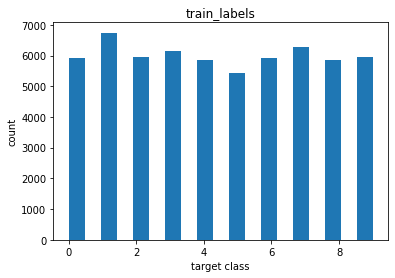

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Train_set Label type: %s'%str(train_labels.shape))
plt.hist(train_labels, bins=19)
plt.title('train_labels')
plt.xlabel('target class')
plt.ylabel('count')
plt.show()

Test_set Label type: (10000,)


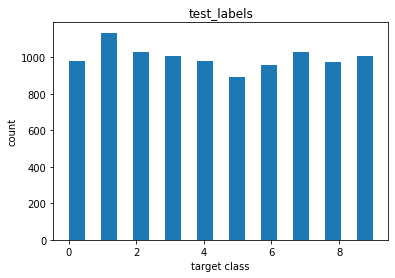

In [ ]:
print('Test_set Label type: %s'%str(test_labels.shape))
plt.hist(test_labels, bins=19)
plt.title('test_labels')
plt.xlabel('target class')
plt.ylabel('count')
plt.show()

In [ ]:
# Class
print('Feature Type: %s' %type(train_images))
print('Label Type: %s' %type(train_labels))

Feature Type: <class 'numpy.ndarray'>
Label Type: <class 'numpy.ndarray'>


In [ ]:
# Shape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [ ]:
# Type
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### 2. Preprocess a data

In [ ]:
# Reshape and Normalize
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

In [ ]:
import tensorflow 
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### 3. Build a model 

Build a five-fully connected layer with 128 neurons each, *elu* as an activation function, and *he initialier* as a weight initialier function using `Sequential()`.
 
The output is a probability for each target class using *softmax* as an activation function. We will use the *Adam optimizer* with the *cross-entropy loss function*.

In [ ]:
from keras import models
from keras import layers

In [ ]:
def model_network():
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,)))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network

### 4. Train the model

We will train the model with 10 epochs and a batch size of 128.

To avoid information leakage to the test set, which would lead to overfitting, we will divide the data into three sets: train, test, and validation. Hence, we will divide the training data into 90% train set and 10% validation set.

Because the keras `validation_split` argument split the last 10% of data to be validation set, the target class may not be evenly distributed in validation set. As a result, we must use sklearn's `train_test_split` function to divide the data into train and validation sets.

Hint: Use the parameter `stratify = y` in `train_test_split()`
See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

### Split data ###
test_size = 0.1
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=test_size, stratify=train_labels)

## X is images, y is label
##################

In [ ]:
### Fit the model ###
network1 = model_network()
history = network1.fit(X_train, y_train, epochs=10, batch_size=128 ,validation_data=(X_val, y_val))
#####################

Epoch 1/10
422/422 [==============================] - 8s 17ms/step - loss: 0.2832 - accuracy: 0.9136 - val_loss: 0.1693 - val_accuracy: 0.9482
Epoch 2/10
422/422 [==============================] - 6s 15ms/step - loss: 0.1355 - accuracy: 0.9576 - val_loss: 0.1276 - val_accuracy: 0.9605
Epoch 3/10
422/422 [==============================] - 6s 15ms/step - loss: 0.1024 - accuracy: 0.9673 - val_loss: 0.1233 - val_accuracy: 0.9600
Epoch 4/10
422/422 [==============================] - 5s 12ms/step - loss: 0.0805 - accuracy: 0.9738 - val_loss: 0.0892 - val_accuracy: 0.9710
Epoch 5/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0713 - accuracy: 0.9770 - val_loss: 0.0987 - val_accuracy: 0.9700
Epoch 6/10
422/422 [==============================] - 3s 8ms/step - loss: 0.0550 - accuracy: 0.9819 - val_loss: 0.0936 - val_accuracy: 0.9710
Epoch 7/10
422/422 [==============================] - 4s 8ms/step - loss: 0.0490 - accuracy: 0.9840 - val_loss: 0.1141 - val_accuracy: 0.9663
Ep

In [ ]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'orange', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'orange', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

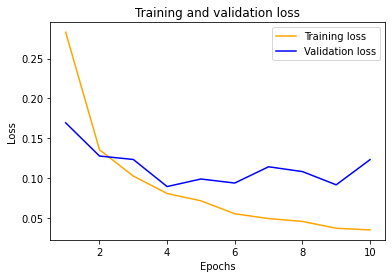

In [ ]:
plot_loss_fn(history)

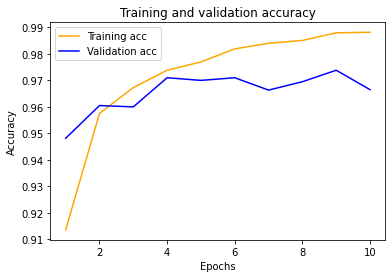

In [ ]:
plot_acc_fn(history)

### 5. Evalute the model

Consider the metric you want to use to evaluate/measure the performance of your model in order to answer the following questions:
1. Is the model overfit or underfit?
2. At what epoch/iteration does it converge or does the model overfit?
3. How does the model perform across all data classes? What is your model's overall performance?


In [ ]:
### Evaluate the model ###
test_loss, test_acc = network1.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9691
Test Loss: 0.11445952206850052
Test Accuracy: 0.9690999984741211


Answer
Answer
1. Model overfit
2. Epoch at 6
3. Accuracy 97.44%

### 6. Tune the model 

Try to tune your model by: 
1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?
2. Apply an early stop. What do you get as a result? (See also https://chrisalbon.com/deep_learning/keras/neural_network_early_stopping/)
4. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?
5. Try adding dropout (any dropout rate) with every layer. What effect does it have on your model? Does it help in the reduction of overfit?

*In the discussion section, discuss the result of these steps*

After completing the preceding steps, **try to achieve the highest precision** by tuning the model using what you have already learned in class. You can experiment with changing the model's structure by increasing or decreasing the number of layers and neuron nodes in each layer. (Use only fully-connected layers for now; no other types of layers!)

**The MNIST model's current highest precision is around 99.8%** (Just try as hard as you can; don't be concerned if you don't achieve this level of precision.)

**In each tuning step, write down what you're doing and why**

**1. Try increasing the number of epochs to see how it affects your model? Does the results improve or become overfit?**

In [ ]:
network2 = model_network()
history2 = network2.fit(X_train, y_train, epochs=20, batch_size=128 ,validation_data=(X_val, y_val))

Epoch 1/20
422/422 [==============================] - 5s 10ms/step - loss: 0.2929 - accuracy: 0.9109 - val_loss: 0.1661 - val_accuracy: 0.9472
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1395 - accuracy: 0.9566 - val_loss: 0.1511 - val_accuracy: 0.9515
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1013 - accuracy: 0.9682 - val_loss: 0.1191 - val_accuracy: 0.9645
Epoch 4/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0799 - accuracy: 0.9737 - val_loss: 0.1113 - val_accuracy: 0.9648
Epoch 5/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0681 - accuracy: 0.9778 - val_loss: 0.1101 - val_accuracy: 0.9655
Epoch 6/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0556 - accuracy: 0.9818 - val_loss: 0.1232 - val_accuracy: 0.9660
Epoch 7/20
422/422 [==============================] - 3s 8ms/step - loss: 0.0507 - accuracy: 0.9836 - val_loss: 0.1112 - val_accuracy: 0.9677
Epoch

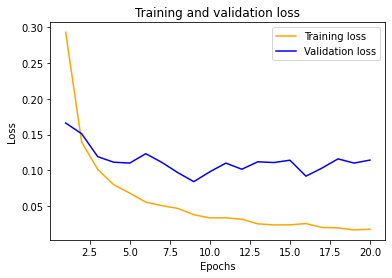

In [ ]:
plot_loss_fn(history2)

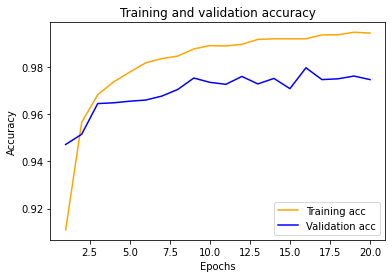

In [ ]:
plot_acc_fn(history2)

Answer Question 6.1

  Model become to overfit.

**2. Apply an early stop. What do you get as a result?**

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping, ModelCheckpoint

keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, mode='min', verbose=1),
    # ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
]


In [ ]:
network3 = model_network()
history3 = network3.fit(X_train, y_train, 
                       epochs=20, 
                       batch_size=128 ,
                       validation_data=(X_val, y_val),
                       callbacks=keras_callbacks,
                       verbose=2
                       )

Epoch 1/20
422/422 - 4s - loss: 0.2976 - accuracy: 0.9084 - val_loss: 0.2076 - val_accuracy: 0.9377 - 4s/epoch - 9ms/step
Epoch 2/20
422/422 - 3s - loss: 0.1406 - accuracy: 0.9559 - val_loss: 0.1492 - val_accuracy: 0.9522 - 3s/epoch - 7ms/step
Epoch 3/20
422/422 - 4s - loss: 0.1029 - accuracy: 0.9683 - val_loss: 0.1361 - val_accuracy: 0.9577 - 4s/epoch - 9ms/step
Epoch 4/20
422/422 - 3s - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.1163 - val_accuracy: 0.9633 - 3s/epoch - 7ms/step
Epoch 5/20
422/422 - 3s - loss: 0.0710 - accuracy: 0.9770 - val_loss: 0.1065 - val_accuracy: 0.9673 - 3s/epoch - 7ms/step
Epoch 6/20
422/422 - 3s - loss: 0.0593 - accuracy: 0.9807 - val_loss: 0.1051 - val_accuracy: 0.9702 - 3s/epoch - 7ms/step
Epoch 7/20
422/422 - 3s - loss: 0.0530 - accuracy: 0.9827 - val_loss: 0.1100 - val_accuracy: 0.9697 - 3s/epoch - 7ms/step
Epoch 8/20
422/422 - 3s - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0974 - val_accuracy: 0.9730 - 3s/epoch - 7ms/step
Epoch 9/20
422/422 - 3s 

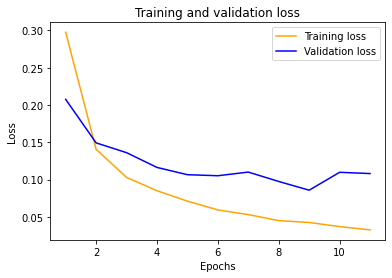

In [ ]:
## history4 using early stopping. epoch=25
plot_loss_fn(history3)

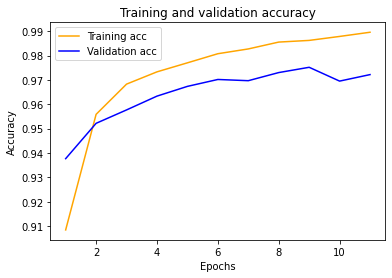

In [ ]:
plot_acc_fn(history3)

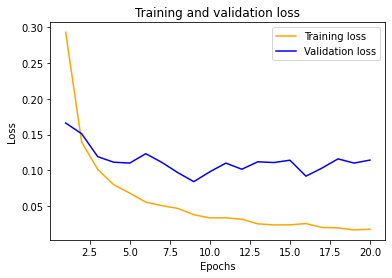

In [ ]:
## history2 non use early stopping. epoch=25
plot_loss_fn(history2)

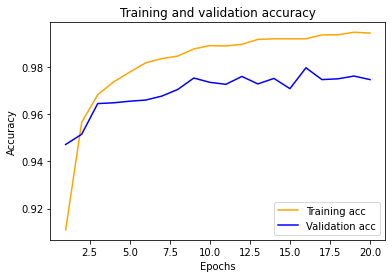

In [ ]:
plot_acc_fn(history2)

In [ ]:
### Evaluate the model ###
test_loss2, test_acc2 = network2.evaluate(test_images, test_labels)
print('Test Loss of History2: %s\nTest Accuracy: %s' % (test_loss2,test_acc2))

test_loss, test_acc = network3.evaluate(test_images, test_labels)
print('Test Loss of History4: %s\nTest Accuracy: %s' % (test_loss,test_acc))
##########################

313/313 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9776
Test Loss of History2: 0.11565202474594116
Test Accuracy: 0.9775999784469604
313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9733
Test Loss of History4: 0.10037780553102493
Test Accuracy: 0.9732999801635742


Answer Question 6.2

At the epoch 6/25 is early stopping. And the history2 looking better than history model. Accuracy reduce to 96.72% but avoid overfitting model.

**3. Try adding regularizers l1 or l2 (or simutaneus l1, l2) to your model. How does it affect your model?**

In [ ]:
## 3.1 Using L1
from tensorflow.keras import layers
from tensorflow.keras import regularizers

def model_network_L1():
  network = models.Sequential()
  network.add(layers.Dense(128, activation='elu' ,input_shape=(28*28,)))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(128, activation='elu'))
  network.add(layers.Dense(10, activation='softmax'))
  network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return network


### 7. Final Evaluation

After you've determined that your model is good enough to be deployed in an application, it's time to evaluate it with a test set to ensure that it generalizes well and does not overfit to the validation set.

### Result & Discussion 

- Summarize the main findings from this lab. Discuss what you did, what you got as a result, and why (support your reason)

### 8. Play with your model

1. Create a 28x28 pixel (any resolution) drawing in any drawing application (for example, Paint or Adobe Photoshop) with a black (#000000) background and white (#FFFFFF) paint.

2. Draw three distinct single digit numbers from 0 to 9. The images should then be saved in PNG format.

3. Install open-cv by
    <br/>for local pc :
 (See https://pypi.org/project/opencv-python)  
> `pip install opencv-python` <br/> or conda (See https://anaconda.org/conda-forge/opencv)

    for colab use:
```import cv2 as cv```

4. Load your images to this IPython using the ```imread()``` function
5. Preprocess the images in the same way you did during the development process.
6. Feed your images to your best model.

What class does your model predict? Is it correct? If not, why does it still get a wrong result when your model is more than 90% accurate?

### Challenges: Play with initializer

- Build a two-layer neural network with any hyperparameter
- Use or create a weight initializer function that sets all the weights to one. See: https://keras.io/initializers/
- Discuss the results. What happened? and why?